# IDS 576 - Assignment 3

# Belief Propagation - Graph using networkx

Nodes of graph: 
['a', 'b', 'c', 'd', 'e', 'f1', 'f2', 'f3', 'f4', 'f5']

Graph Network


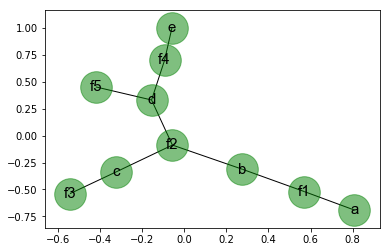

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G = nx.Graph()

G.add_node('a', support = {1,2})
G.add_node('b', support = {1,2})
G.add_node('c', support = {1,2})
G.add_node('d', support = {1,2})
G.add_node('e', support = {1,2})
G.add_nodes_from(['f1','f2','f3','f4','f5'])
G.add_edges_from([('a', 'f1'), ('f1', 'b'), ('b', 'f2'), ('f2', 'c'), ('f2', 'd'), ('c', 'f3'),('d', 'f5'),('d', 'f4'),('f4', 'e')])

print("Nodes of graph: ")
print(G.nodes())
print("\nGraph Network")

#G.Graph
graph_pos = nx.spring_layout(G)

# draw nodes, edges and labels
nx.draw_networkx_nodes(G, graph_pos, node_size=1000, node_color='green', alpha=0.5)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=15, font_family='Arial')


#nx.draw(G)
plt.show()



#  Belief Propagation Implementation

In [39]:
G.node['a']['support']

{1, 2}

In [49]:
import numpy as np
a = list((G.node['a']['support']))
np_a = np.array(a)

b = list((G.node['b']['support']))
np_b = np.array(b)

c = list((G.node['c']['support']))
np_c = np.array(c)

d = list((G.node['d']['support']))
np_d = np.array(d)

e = list((G.node['e']['support']))
np_e = np.array(e)

#Question - 5.1, 1 and 3 part
def f1(x,y):
    temp = []
    for i in x:
        for j in y:
            temp.append(i*j)
    return temp

#Question - 5.1, 2 part
def f2(x,y,z):
    temp = []
    for i in x:
        for j in y:
            for k in z:
                temp.append( 2*(5 - i*j)-k+1 ) 
    return temp

#Question - 5.1, 4 and 5 part
def f3(x):
    return 3-x

result1 = f1(np_a,np_b)
result2 = f2(np_b,np_c,np_d)
result3 = f1(np_d,np_e)
result4 = f3(np_c)
result5 = f3(np_d)

print("1.",result1)
print("2.",result2)
print("3.",result3)
print("4.",result4)
print("5.",result5)

# 1. f1(a, b) = a ∗ b (for example, f1(a = 1, b = 2) = 1 ∗ 2 = 2).
# 2. f2(b, c, d) = 2 ∗ (5 − b ∗ c) − d + 1.
# 3. f4(d, e) = d ∗ e.
# 4. f3(c) = 3 − c.
# 5. f5(d) = 3 − d.

1. [1, 2, 2, 4]
2. [8, 7, 6, 5, 6, 5, 2, 1]
3. [1, 2, 2, 4]
4. [2 1]
5. [2 1]


In [50]:
# initialize messages from node variables to 1
message_from_e = [0,0]
for i in range(np_e.shape[0]):
    message_from_e[i] = 1
print("Message from variable e is --> ")
print(message_from_e)

def f4_to_d(d,e):
    temp_sum = []
    for i in d:
        sum = 0
        for j in e:
            sum = sum + i*j
        temp_sum.append(sum)    
    return temp_sum

def d_to_f2(x,y):
    return x * y

# summing out on c,d
# Input - (b,c,d)
def sum_over_cd(b,c,d):
    temp = []
    for i in b:
        sum = 0
        for j in c:
            for k in d:
                sum = sum + 2*(5 - i*j)-k+1
        temp.append(sum)
    return temp
        
# compute message from factor f2 to b
def f2_to_b(x,y,z):
    return np.multiply(x,np.multiply(y,z))



def summer(x,potentials):
    temp=[]
    for j in potentials:
        if j % 2 == 0:
            temp.append(j*x[0])# do something
        else:
            temp.append(j*x[1])
            # do something
    return temp

def mul_vals(x):
    temp = []
    for i in range(0,8,2):
        temp.append(x[i] + x[i+1])
    return temp


def compute_bcd(x,y):
    temp=[]
    for i in range(4):
        if i % 2 == 0:
            temp.append(y[i]*x[0])# do something
        else:
            temp.append(y[i]*x[1])
            
    return temp


def compute_marginals(x,y):
    temp = []
    for i in range(4):
        if i % 2 == 0 :
            temp.append(y[i]*x[0])
        else:
            temp.append(y[i]*x[1])
    return temp    


f4_d = f4_to_d(np_d,np_e)
msg_e = np.array(message_from_e)
np_f4_d  = np.array(f4_d)

np_mul = msg_e * np_f4_d
print("Summing out on e --> ")
print(np_mul)

# Computing f5(d) by calling the function
f5_d = f5(np_d)

# compute message from d to f2
d_f2 = d_to_f2(np_mul,f5_d)
print("Message from variable d to factor f2 is --->")
print(d_f2)
d_f2_norm = d_f2 / d_f2.max()
print("Normalizing over the array, it can be written as --->")
print(d_f2_norm)


# Potential function of b,c,d
print("Potential function of b,c,d is ---> ")
print(result2)

# Multiplying by the normalized message from node d
summer_extract = summer(d_f2_norm,result2)


# Summing over possible values for potential function of b,c,d
intermediate_summer = mul_vals(summer_extract)    
print("Intermediate value for summing over the potential function is -->")
print(intermediate_summer)

message_from_c = result3 # using the function f3(c)
print("Message from c-->")
print(message_from_c)

f2_bcd_final = compute_bcd(message_from_c, intermediate_summer)
print("Final output after summing over factor B,C and D is --> ")
print(f2_bcd_final)


x = f2_bcd_final[0] + f2_bcd_final[1]
y = f2_bcd_final[2] + f2_bcd_final[3]

print("Summing over possible support values...")
print("Element 1 is " + str(x))
print("Element 2 is " + str(y))

temp_xy = [x,y]
temp_xy = np.array(temp_xy) 
print("Temporary array holder for the given elements")
print(temp_xy)


f1_ab = result1 # From the initially calculated value
print(" f1(a,b) is -->")
print(f1_ab)


marginals = compute_marginals(temp_xy,f1_ab)
print("Marginals are --> ")
print(marginals)




Message from variable e is --> 
[1, 1]
Summing out on e --> 
[3 6]
Message from variable d to factor f2 is --->
[6 6]
Normalizing over the array, it can be written as --->
[1. 1.]
Potential function of b,c,d is ---> 
[8, 7, 6, 5, 6, 5, 2, 1]
Intermediate value for summing over the potential function is -->
[15.0, 11.0, 11.0, 3.0]
Message from c-->
[1, 2, 2, 4]
Final output after summing over factor B,C and D is --> 
[15.0, 22.0, 11.0, 6.0]
Summing over possible support values...
Element 1 is 37.0
Element 2 is 17.0
Temporary array holder for the given elements
[37. 17.]
 f1(a,b) is -->
[1, 2, 2, 4]
Marginals are --> 
[37.0, 34.0, 74.0, 68.0]


#  Marginal distribution table P(A=a, B=b)

In [52]:
from astropy.table import Table, Column
import numpy as np
summation_marginals = np.sum(marginals)

marginal_prob = np.zeros(0)
c=np.zeros(0)
# Calculating normalized probabilities
c = np.append(marginal_prob, marginals/summation_marginals)


# Plotting the table
t = Table([f1_ab, marginals, c],names = ('function of a,b = f1','un-normalized values','Marginal Distribution'))
print(t)


function of a,b = f1 un-normalized values Marginal Distribution
-------------------- -------------------- ---------------------
                   1                 37.0   0.17370892018779344
                   2                 34.0    0.1596244131455399
                   2                 74.0    0.3474178403755869
                   4                 68.0    0.3192488262910798
